In [1]:
!pip install --upgrade tensorflow transformers

In [34]:
!pip install sentencepiece

  Obtaining dependency information for sentencepiece from https://files.pythonhosted.org/packages/a2/f6/587c62fd21fc988555b85351f50bbde43a51524caafd63bc69240ded14fd/sentencepiece-0.2.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   - ------------------------------------- 30.7/991.5 kB 640.0 kB/s eta 0:00:02
   ---- ----------------------------------- 122.9/991.5 kB 1.4 MB/s eta 0:00:01
   ---------- ----------------------------- 266.2/991.5 kB 2.0 MB/s eta 0:00:01
   --------------- ------------------------ 389.1/991.5 kB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 450.6/991.5 kB 2.0 MB/s eta 0:00:01
   -------------------------- ------------- 645.1/991.5 kB 2.4 MB/s eta 0:00:01
   ------------------------------- -------- 778.2/991.5 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 991.5/991.5 kB 2.7 MB/s eta 0:00:0

In [ ]:
!pip install focal_loss

In [135]:
!pip install krippendorff

  Obtaining dependency information for krippendorff from https://files.pythonhosted.org/packages/51/4b/5228834939e4a02c7ca2e7adfb223ace6fc5374230c0713ea8970b6ce92d/krippendorff-0.8.0-py3-none-any.whl.metadata


In [ ]:
!pip install torch transformers

In [ ]:
!pip install AutoTokenizer

In [84]:
!pip install tqdm

In [175]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --- ----------------------------------- 61.4/626.3 kB 825.8 kB/s eta 0:00:01
   -------------------- ------------------- 317.4/626.3 kB 2.8 MB/s eta 0:00:01
   ------------------------------------- -- 593.9/626.3 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from tensorflow.keras.preprocessing.text import Tokenizer
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install focal-loss
from tensorflow.keras import Input,Model
from tensorflow.keras.layers import Embedding,SimpleRNN,LSTM,concatenate,Dense,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,average_precision_score,accuracy_score
from focal_loss import BinaryFocalLoss
from sklearn.preprocessing import MultiLabelBinarizer
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from keras.callbacks import EarlyStopping
from transformers import T5Tokenizer, TFT5ForConditionalGeneration
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from transformers import AutoTokenizer, AutoModelForSequenceClassification
#from transformers import DistilBertTokenizer, TFDistilBertMode
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import TFAutoModel



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Analysis and Cleaning

In [ ]:
# Load the data
df = pd.read_excel("classification/Electroscope_model_just_noimages_studentID.xlsx")

# Display the first 5 rows of the file
print(df.head(5))

   Student ID  SequenceID            Image Student ID  \
0      2856.0           1  Image for Student ID: 2856   
1      2858.0           2  Image for Student ID: 2858   
2      2866.0           3  Image for Student ID: 2866   
3      2863.0           4  Image for Student ID: 2863   
4      2990.0           5  Image for Student ID: 2990   

                                       Justification  Category 1  Category 2  \
0  the rob in A is not charge which makes the lea...         0.0         0.0   
1                                                NaN         0.0         0.0   
2                       The rod in B has more charge         1.0         0.0   
3           I think that they have different charges         0.0         0.0   
4  One force is stronger then the other. Or one r...         1.0         0.0   

   Category 3  Category 4  Category 5  Category 6  ...  Category 12  \
0         0.0         0.0         0.0         0.0  ...          0.0   
1         0.0         0.0         

In [64]:
df.shape

(1151, 25)

In [65]:
df.count()

Student ID          1059
SequenceID          1151
Image Student ID    1059
Justification       1023
Category 1          1059
Category 2          1059
Category 3          1059
Category 4          1059
Category 5          1059
Category 6          1059
Category 7          1058
Category 8          1059
Category 9          1059
Category 10         1058
Category 11         1059
Category 12         1058
Category 13         1059
Category 14         1073
Category 15         1073
Category 16         1072
Category 17         1073
Category 18         1072
Category 19         1072
Category 20         1073
Category 21         1073
dtype: int64

We notice that our dataset contains missing values, as the number of rows in the dataset differs from the number of values for the various variables. It is therefore necessary to handle these missing values. To do this, we must:

 - Remove all rows that do not have a justification.
 - Check if there are any variables to classify that still contain missing values.
 - Use one of the known techniques to handle these missing values.

In [66]:
df = df.dropna(subset=["Justification"])

In [67]:
occurrences = df["Student ID"].value_counts()

print(occurrences)

Student ID
1916.0    2
2856.0    1
3283.0    1
3293.0    1
3304.0    1
         ..
3534.0    1
3533.0    1
3545.0    1
3551.0    1
3122.0    1
Name: count, Length: 1022, dtype: int64


We notice that the variable ``Student ID`` has only one occurrence for each student. This means that this variable is not important for the classification of our different target variables. Therefore, we should only use the ``Justification`` variable as input data moving forward.

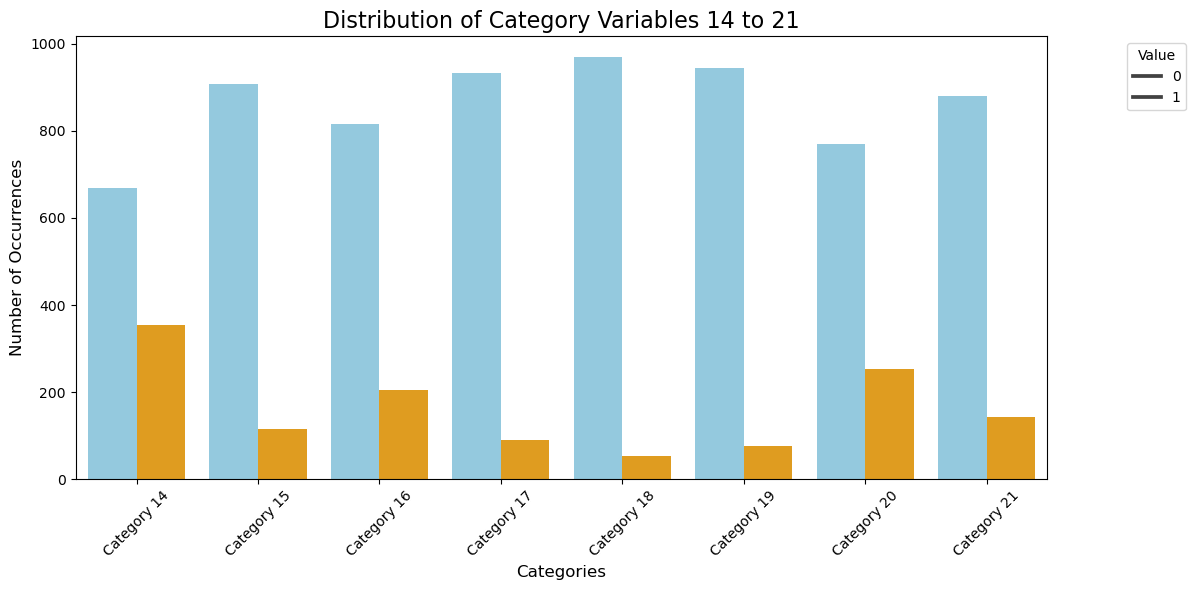

In [56]:
# Select the category columns
categories = [f'Category {i}' for i in range(14, 22)]

# Calculate the distribution (count of 0s and 1s for each category)
category_counts = pd.DataFrame({col: df[col].value_counts() for col in categories}).fillna(0).astype(int)

# Transpose the data for compatibility with Seaborn visualization
category_counts = category_counts.T
category_counts.reset_index(inplace=True)
category_counts = category_counts.rename(columns={"index": "Category", 0: "0 (Count)", 1: "1 (Count)"})

# Prepare the data for Seaborn
category_counts_melted = category_counts.melt(id_vars=["Category"], 
                                              value_vars=["0 (Count)", "1 (Count)"], 
                                              var_name="Value", 
                                              value_name="Count")

# Define a custom palette with sky blue and orange
custom_palette = ["#87CEEB", "#FFA500"]

# Create the histogram
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts_melted, x="Category", y="Count", hue="Value", palette=custom_palette)

# Add labels and a title
plt.title("Distribution of Category Variables 14 to 21", fontsize=16)
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.legend(title="Value", labels=["0", "1"], loc="upper right", bbox_to_anchor=(1.15, 1))

# Adjust tick rotation for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

In our analysis, we observe that all target variables exhibit significant imbalance, with a clear predominance of class 0. This imbalance is particularly pronounced for the target variables ``Category 15``, ``Category 17``, ``Category 18``, and ``Category 19``.

This imbalance can have significant implications for model training. Specifically, models trained on such data are likely to develop a strong tendency to classify observations into the majority class (class 0), which could substantially impact their overall performance. This tendency is particularly evident in the model’s reduced ability to correctly classify instances from the minority class (class 1), thereby compromising their **precission** and effectiveness in tasks where the minority class is of critical importance.

## Conclusion of the Analysis:
 - Some students had missing information, which led to their removal, reducing our dataset from 1130 to 1023 entries.
 - We do not have enough data, which could pose a challenge for training our models, especially since we will be using generative models and deep learning models, which are highly data-intensive.
 - The target variable classes are imbalanced, which could result in underperformance of our models.
 - It would be advisable to perform data augmentation to balance the dataset and increase its size, ensuring the models have sufficient data for training.

# Models Construction

## DistilBERT Model

It is a lightweight version of BERT, which is a generative model, with a few additional layers for adaptation to the multi-label classification task.

In [ ]:
# Load the data
df = pd.read_excel("Electroscope_model_just_noimages_studentID.xlsx")

# Select relevant columns
df = df[["Justification", "Category 14", "Category 15", "Category 16", "Category 17", "Category 18", "Category 19", "Category 20", "Category 21"]]

# Remove rows with missing values in the justification column
df = df.dropna(subset=["Justification"])

# Replace NaN values in the categories with 0 (if applicable)
df.fillna(0, inplace=True)

# Convert categories to integer type
categories = ["Category 14", "Category 15", "Category 16", "Category 17", "Category 18", "Category 19", "Category 20", "Category 21"]
df[categories] = df[categories].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["Justification"], df[categories], test_size=0.2, random_state=42)

# Initialize the DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
bert_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

# Tokenize texts with a fixed length
def tokenize_texts(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        max_length=max_length,
        padding="max_length",  # Adds [PAD] tokens to reach max length
        truncation=True,       # Truncates sequences that are too long
        return_tensors="tf"
    )

train_tokens = tokenize_texts(X_train, tokenizer, max_length=128)
test_tokens = tokenize_texts(X_test, tokenizer, max_length=128)

# Define the multi-label classification model
def create_model():
    input_ids = tf.keras.Input(shape=(128,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.Input(shape=(128,), dtype=tf.int32, name="attention_mask")

    bert_output = bert_model(input_ids, attention_mask=attention_mask)
    pooled_output = bert_output.last_hidden_state[:, 0, :]  # Use the first token (CLS)
    dense = tf.keras.layers.Dense(256, activation="relu")(pooled_output)
    output = tf.keras.layers.Dense(8, activation="sigmoid")(dense)  # 8 categories

    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = create_model()

# Train the model
history = model.fit(
    {"input_ids": train_tokens["input_ids"], "attention_mask": train_tokens["attention_mask"]},
    y_train.values,
    validation_split=0.1,
    epochs=10,
    batch_size=16
)

# Make predictions on the test set
y_pred = model.predict({"input_ids": test_tokens["input_ids"], "attention_mask": test_tokens["attention_mask"]})
y_pred_binary = (y_pred > 0.5).astype(int)

# List to store metrics
metrics_data = []

# Compute metrics for each category individually
for i, category in enumerate(categories):
    acc = accuracy_score(y_test.values[:, i], y_pred_binary[:, i])
    prec = precision_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    rec = recall_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    f1 = f1_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    
    metrics_data.append({
        "Category": category,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Epoch 1/10
46/46 [==============================] - 209s 4s/step - loss: 0.3861 - accuracy: 0.5815 - val_loss: 0.2913 - val_accuracy: 0.6220
Epoch 2/10
46/46 [==============================] - 192s 4s/step - loss: 0.2305 - accuracy: 0.7079 - val_loss: 0.2029 - val_accuracy: 0.7439
Epoch 3/10
46/46 [==============================] - 192s 4s/step - loss: 0.1531 - accuracy: 0.7799 - val_loss: 0.1813 - val_accuracy: 0.7195
Epoch 4/10
46/46 [==============================] - 193s 4s/step - loss: 0.1127 - accuracy: 0.7826 - val_loss: 0.1765 - val_accuracy: 0.7317
Epoch 5/10
46/46 [==============================] - 202s 4s/step - loss: 0.0822 - accuracy: 0.8043 - val_loss: 0.1720 - val_accuracy: 0.6951
Epoch 6/10
46/46 [==============================] - 200s 4s/step - loss: 0.0644 - accuracy: 0.7989 - val_loss: 0.1958 - val_accuracy: 0.7195
Epoch 7/10
46/46 [==============================] - 194s 4s/step - loss: 0.0445 - accuracy: 0.8302 - val_loss: 0.1753 - val_accuracy: 0.7317
Epoch 8/10
46

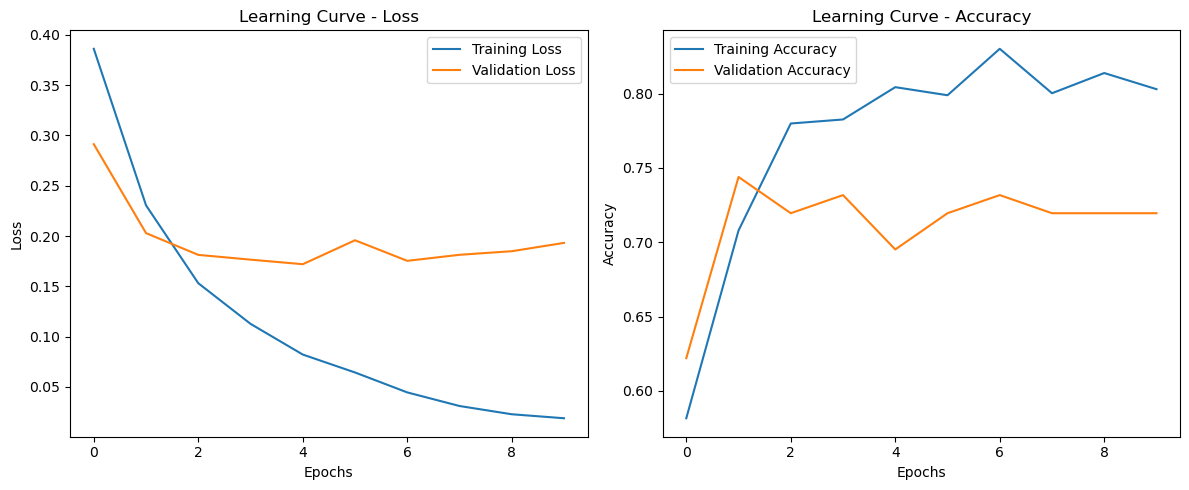

In [51]:
# Visualize learning curves (Accuracy and Loss)
def plot_learning_curve(history):
    # Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curve - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.tight_layout()
    plt.show()

# Call the function to display the curves
plot_learning_curve(history)

We can observe that this model demonstrates acceptable performance, although it struggles somewhat with handling the data for Category 14.

## Neural Network Based on a Single Layer (SimpleRNN): 
This is a multi-label text classification model utilizing GloVe for embeddings and SimpleRNN for processing textual sequences, tailored for multi-label categorical data.

In [ ]:
# Load the data
df = pd.read_excel("Electroscope_model_just_noimages_studentID.xlsx")

# Remove rows with missing justification
df = df.dropna(subset=["Justification"])

In [68]:
X=df.iloc[:,3].copy()
print(X.head(10))

0     the rob in A is not charge which makes the lea...
2                          The rod in B has more charge
3              I think that they have different charges
4     One force is stronger then the other. Or one r...
5       in scenario B the charge of the rod is stronger
6     Scenario A Shows how the rod is negatively cha...
7     That at this point they repel each other on sc...
9                             the charegs are different
10    the foil is split off the pin more in scenario...
11    Scenario A has leaves that are not as spaced o...
Name: Justification, dtype: object


In [69]:
Y=df.iloc[:,17:].copy()

In [70]:
# splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [71]:
class Preprocessing:
    
    
    def __init__(self):
        #
        self.stop_words=stopwords.words('english')
        self.lemmatizer=WordNetLemmatizer()
        self.tokenizer=Tokenizer()
        self.training=None
        
        
    def remove_punctuations(self,text):
        #
        text=text.lower()
        cleaned_text =re.findall("[a-zA-Z]+", text)
        
        return cleaned_text
    

    def stop_words_remover(self,text):
        #
        cleaned_text=[w for w in text if not w in self.stop_words]
        
        return cleaned_text
    
    
    def lemmatize(self,text):
        #
        cleaned_text=' '.join([self.lemmatizer.lemmatize(i) for i in text])
        
        return cleaned_text
    
    
    def tokenize(self,X_cleaned): 
        #
        if self.training:
            self.tokenizer.fit_on_texts(X_cleaned)
            
        # converting text to sequence of tokens
        X_seq = self.tokenizer.texts_to_sequences(X_cleaned)

        # converting sequences to text
        X_txt = self.tokenizer.sequences_to_texts(X_seq)
        
        return X_seq, X_txt
        
    
    def preprocess(self,X,training=True):
        #
        X_preprocessed=pd.DataFrame()
        self.training=training
        X=X.apply(lambda x: self.remove_punctuations(x))
        X=X.apply(lambda x: self.stop_words_remover(x))
        X=X.apply(lambda x: self.lemmatize(x))
        X_preprocessed['seq'],X_preprocessed['txt']= self.tokenize(X)
        
        return X_preprocessed,self.tokenizer

In [72]:
#Preprocessing train and test
pp_title = Preprocessing()
X_title_train,tokenizer_title=pp_title.preprocess(X=X_train)
X_title_test,_=pp_title.preprocess(X=X_test,training=False)

In [73]:
#Word count
seqlen_title=X_title_train['txt'].apply(lambda x: len(x.split()))

C:\Users\EG\AppData\Local\Temp\ipykernel_21900\625528134.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(seqlen_title,bins=20)


<Axes: xlabel='txt', ylabel='Density'>

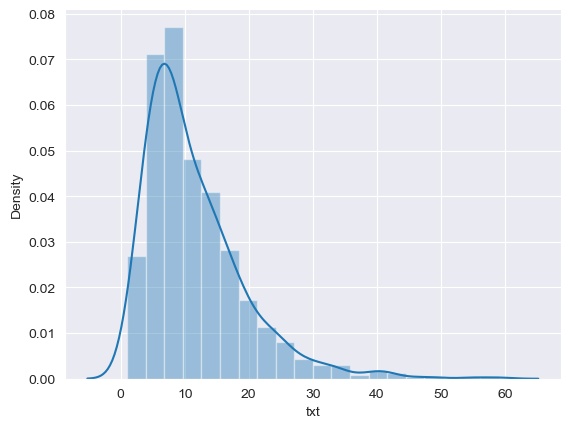

In [74]:
#Plotting title word count
sns.set_style("darkgrid")
sns.distplot(seqlen_title,bins=20)

In [75]:
max_len_title=40

In [76]:
#Converting train  into sequences
X_title_seq = pad_sequences(X_title_train['seq'], maxlen = max_len_title, padding = 'pre', truncating='post')

In [77]:
#Converting test into sequence
X_title_seq_test = pad_sequences(X_title_test['seq'], maxlen = max_len_title, padding = 'pre', truncating='post')

In [78]:
vocab_size_title = len(tokenizer_title.word_index) + 1

In [79]:
print(vocab_size_title)

788


In [85]:
from tqdm import tqdm

In [86]:
# Initialize the embeddings dictionary
embedding_vector = {}

# Open the file with UTF-8 encoding
with open('C:/Users/EG/Desktop/Dr_prudence_projet/glove.840B.300d.txt', 'r', encoding='utf8') as f:
    for line in tqdm(f):
        # Split the line into the word and its vectors
        value = line.split(' ')
        word = value[0]
        coef = np.array(value[1:], dtype='float32')  # Convert the vectors to a NumPy array
        embedding_vector[word] = coef

622339it [01:00, 10347.52it/s]


In [87]:
#Embedding for title
oov_title=[]
embedding_matrix_title = np.zeros((vocab_size_title, 300))
for word, i in tqdm(tokenizer_title.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
      embedding_matrix_title[i] = embedding_value
    else:
      oov_title.append(word)

100%|██████████| 787/787 [00:00<00:00, 174614.75it/s]


In [146]:
def create_model():
    title_input = Input(shape=(None,), name="title") 
    title_features = Embedding(vocab_size_title, 300, weights = [embedding_matrix_title], input_length = max_len_title, trainable = False)(title_input)
    title_features = SimpleRNN(64,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(title_features)
    x = title_features
    Category_14_pred = Dense(1, activation='sigmoid',name='Category_14',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    Category_15_pred = Dense(1, activation='sigmoid',name='Category_15',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    Category_16_pred = Dense(1, activation='sigmoid',name='Category_16',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    Category_17_pred = Dense(1, activation='sigmoid',name='Category_17',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    Category_18_pred = Dense(1, activation='sigmoid',name='Category_18',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    Category_19_pred = Dense(1, activation='sigmoid',name='Category_19',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    Category_20_pred = Dense(1, activation='sigmoid',name='Category_20',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    Category_21_pred = Dense(1, activation='sigmoid',name='Category_21',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    
    
    
    model = Model(inputs=title_input,outputs=[Category_14_pred,Category_15_pred,Category_16_pred,Category_17_pred,Category_18_pred,Category_19_pred,Category_20_pred,Category_21_pred])
    return model

In [147]:
model=create_model()
plot_model(model, "multi_label_classification_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [148]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, None)]               0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, None, 300)            236400    ['title[0][0]']               
                                                                                                  
 simple_rnn_2 (SimpleRNN)    (None, 64)                   23360     ['embedding_2[0][0]']         
                                                                                                  
 Category_14 (Dense)         (None, 1)                    65        ['simple_rnn_2[0][0]']        
                                                                                           

In [149]:
model.compile(
    optimizer=Adam(),
    loss=BinaryFocalLoss(gamma=2),
    metrics=['accuracy', 'accuracy', 'accuracy', 'accuracy', 
             'accuracy', 'accuracy', 'accuracy', 'accuracy']  
)

In [150]:
model.compile(
    optimizer=Adam(),
    loss={
        'Category_14': BinaryFocalLoss(gamma=2),
        'Category_15': BinaryFocalLoss(gamma=2),
        'Category_16': BinaryFocalLoss(gamma=2),
        'Category_17': BinaryFocalLoss(gamma=2),
        'Category_18': BinaryFocalLoss(gamma=2),
        'Category_19': BinaryFocalLoss(gamma=2),
        'Category_20': BinaryFocalLoss(gamma=2),
        'Category_21': BinaryFocalLoss(gamma=2)
    },
    metrics={
        'Category_14': ['accuracy'],
        'Category_15': ['accuracy'],
        'Category_16': ['accuracy'],
        'Category_17': ['accuracy'],
        'Category_18': ['accuracy'],
        'Category_19': ['accuracy'],
        'Category_20': ['accuracy'],
        'Category_21': ['accuracy']
    }
)


In [151]:
callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

history = model.fit(
    {"title": X_title_seq}, 
    {
        'Category_14': y_train.iloc[:, 0], 
        'Category_15': y_train.iloc[:, 1], 
        'Category_16': y_train.iloc[:, 2], 
        'Category_17': y_train.iloc[:, 3], 
        'Category_18': y_train.iloc[:, 4], 
        'Category_19': y_train.iloc[:, 5],
        'Category_20': y_train.iloc[:, 6],
        'Category_21': y_train.iloc[:, 7]
    },
    epochs=100, 
    validation_data=(
        {"title": X_title_seq_test}, 
        {
            'Category_14': y_test.iloc[:, 0], 
            'Category_15': y_test.iloc[:, 1], 
            'Category_16': y_test.iloc[:, 2], 
            'Category_17': y_test.iloc[:, 3], 
            'Category_18': y_test.iloc[:, 4], 
            'Category_19': y_test.iloc[:, 5],
            'Category_20': y_test.iloc[:, 6],
            'Category_21': y_test.iloc[:, 7]
        }
    ),
    callbacks=callbacks,
    verbose=2
)


Epoch 1/100
26/26 - 8s - loss: 2.6042 - Category_14_loss: 0.1871 - Category_15_loss: 0.1294 - Category_16_loss: 0.1547 - Category_17_loss: 0.1664 - Category_18_loss: 0.1292 - Category_19_loss: 0.1211 - Category_20_loss: 0.1772 - Category_21_loss: 0.1573 - Category_14_accuracy: 0.5954 - Category_15_accuracy: 0.8643 - Category_16_accuracy: 0.7249 - Category_17_accuracy: 0.7298 - Category_18_accuracy: 0.7628 - Category_19_accuracy: 0.7934 - Category_20_accuracy: 0.6650 - Category_21_accuracy: 0.7567 - val_loss: 2.2249 - val_Category_14_loss: 0.1657 - val_Category_15_loss: 0.1023 - val_Category_16_loss: 0.1260 - val_Category_17_loss: 0.0771 - val_Category_18_loss: 0.0628 - val_Category_19_loss: 0.0697 - val_Category_20_loss: 0.1286 - val_Category_21_loss: 0.1460 - val_Category_14_accuracy: 0.6634 - val_Category_15_accuracy: 0.8390 - val_Category_16_accuracy: 0.8098 - val_Category_17_accuracy: 0.9073 - val_Category_18_accuracy: 0.9463 - val_Category_19_accuracy: 0.9366 - val_Category_20_acc

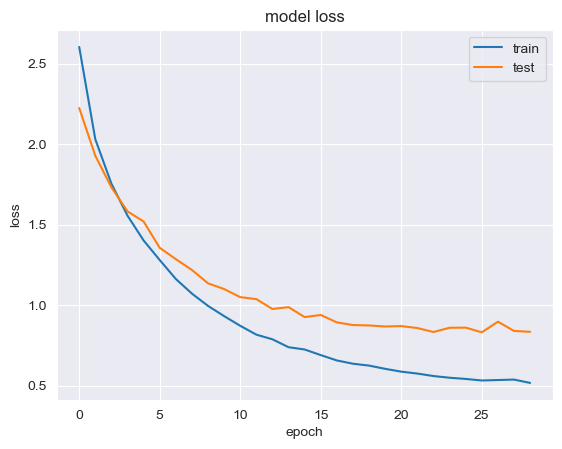

In [152]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [153]:
y_pred=model.predict({"title": X_title_seq_test})

7/7 [==============================] - 0s 14ms/step


In [154]:
categories=Y.columns

In [155]:
#Converting y_pred to suitable format
y_dict={"0":y_pred[0][:].flatten(),"1":y_pred[1][:].flatten(),'2':y_pred[2][:].flatten(),'3':y_pred[3][:].flatten(),'4':y_pred[4][:].flatten(),'5':y_pred[5][:].flatten(),'6':y_pred[6][:].flatten(),'7':y_pred[7][:].flatten()}

In [156]:
y_df=pd.DataFrame.from_dict(y_dict)

In [157]:
y_df.head()

,0,1,2,3,4,5,6,7
0,0.175178,0.131017,0.116341,0.101485,0.098008,0.166578,0.563076,0.201322
1,0.314313,0.138279,0.185630,0.237443,0.227842,0.406287,0.130355,0.426172
2,0.655787,0.082189,0.395140,0.110153,0.166249,0.229293,0.204803,0.102814
3,0.356824,0.191609,0.214131,0.130960,0.123764,0.166913,0.529208,0.179865
4,0.152723,0.103770,0.147363,0.120862,0.110350,0.090048,0.679609,0.126078


In [158]:
y_df.columns=Y.columns

In [159]:
#Function to find  balanced value for precesion and recall
def find_threshold(y_test,y_prob):
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, marker='.', label='Model')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    #Find best threshold
    min_diff=1
    for i in range(len(recall)):
        diff=abs(recall[i] -precision[i])
        if diff<min_diff:
            min_diff=diff
            best_threshold=thresholds[i]
            index=i
            
    print(f'Precision and Recall for threshold {best_threshold} = {precision[index]} and {recall[index]}')
    
    return best_threshold

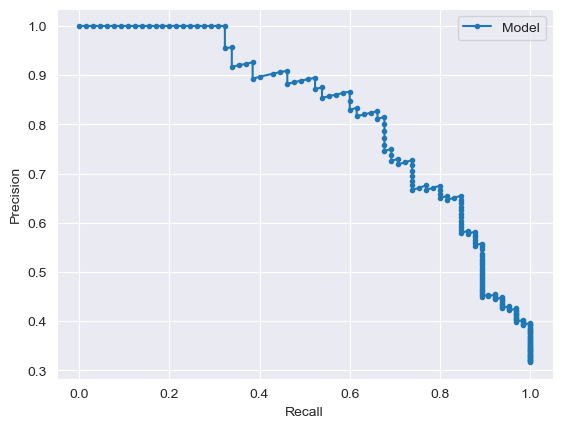

Precision and Recall for threshold 0.45799288153648376 = 0.7230769230769231 and 0.7230769230769231


In [160]:
threshold_14=find_threshold(y_test['Category 14'],y_df['Category 14'])

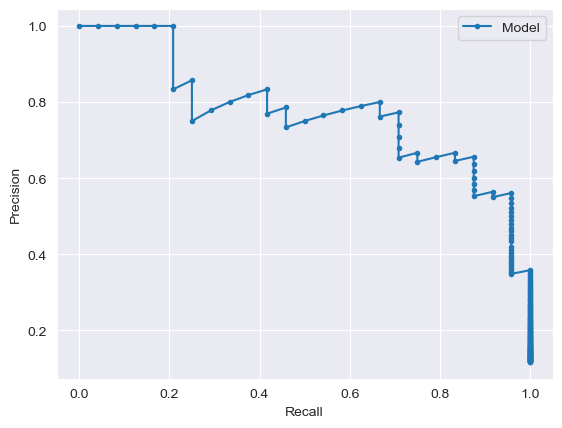

Precision and Recall for threshold 0.4486114978790283 = 0.7083333333333334 and 0.7083333333333334


In [161]:
threshold_15=find_threshold(y_test['Category 15'],y_df['Category 15'])

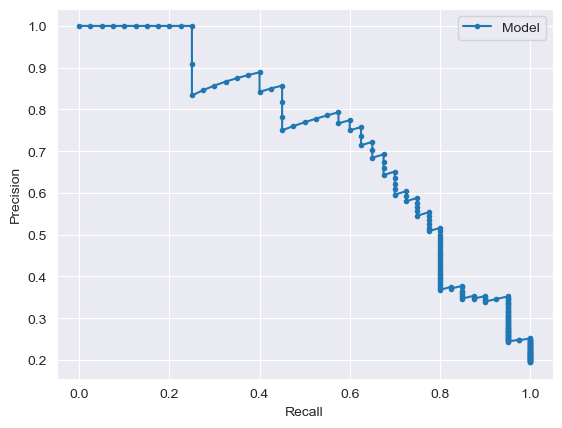

Precision and Recall for threshold 0.4176468253135681 = 0.675 and 0.675


In [162]:
threshold_16=find_threshold(y_test['Category 16'],y_df['Category 16'])

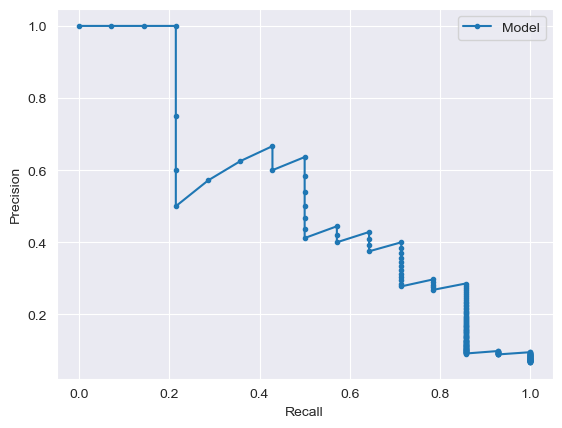

Precision and Recall for threshold 0.48539844155311584 = 0.5 and 0.5


In [163]:
threshold_17=find_threshold(y_test['Category 17'],y_df['Category 17'])

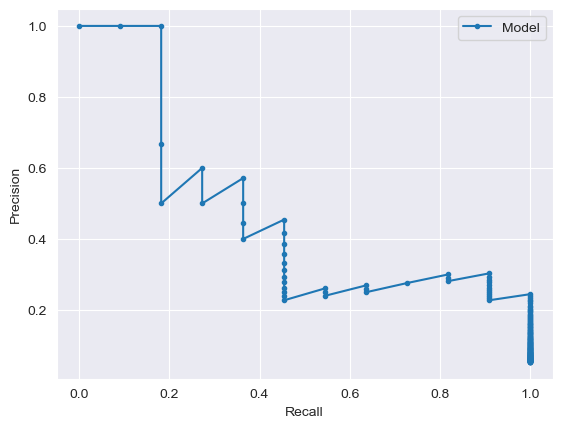

Precision and Recall for threshold 0.43903839588165283 = 0.45454545454545453 and 0.45454545454545453


In [164]:
threshold_18=find_threshold(y_test['Category 18'],y_df['Category 18'])

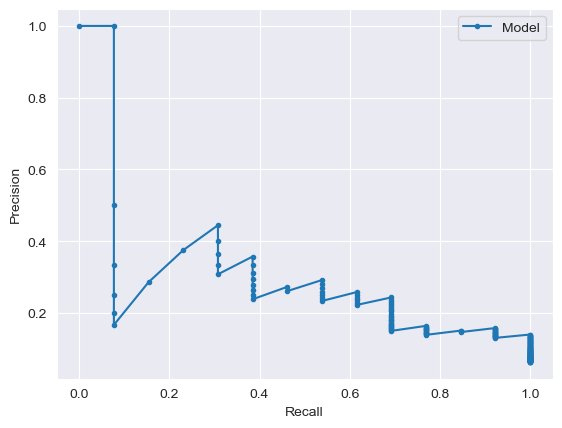

Precision and Recall for threshold 0.45076674222946167 = 0.3076923076923077 and 0.3076923076923077


In [165]:
threshold_19=find_threshold(y_test['Category 19'],y_df['Category 19'])

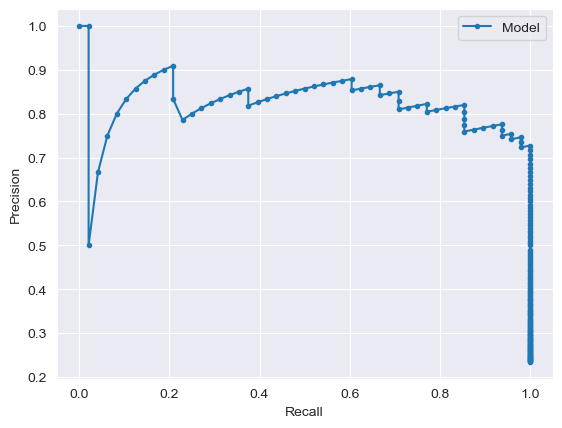

Precision and Recall for threshold 0.5036382675170898 = 0.8125 and 0.8125


In [166]:
threshold_20=find_threshold(y_test['Category 20'],y_df['Category 20'])

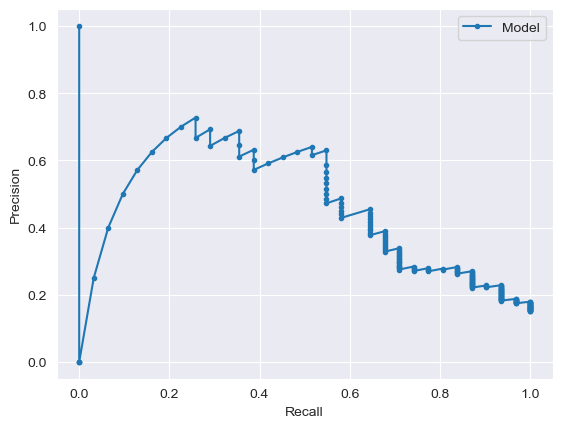

Precision and Recall for threshold 0.5027236938476562 = 0.5483870967741935 and 0.5483870967741935


In [167]:
threshold_21=find_threshold(y_test['Category 21'],y_df['Category 21'])

In [168]:
y_pred=y_df.copy()

In [169]:
#From the above precision recall curve selected threshold values
y_pred["Category 14"]=np.where(y_pred["Category 14"]>=threshold_14,1,0)
y_pred["Category 15"]=np.where(y_pred["Category 15"]>=threshold_15,1,0)
y_pred["Category 16"]=np.where(y_pred["Category 16"]>=threshold_16,1,0)
y_pred["Category 17"]=np.where(y_pred["Category 17"]>=threshold_17,1,0)
y_pred["Category 18"]=np.where(y_pred["Category 18"]>=threshold_18,1,0)
y_pred["Category 19"]=np.where(y_pred["Category 19"]>=threshold_19,1,0)
y_pred["Category 20"]=np.where(y_pred["Category 20"]>=threshold_20,1,0)
y_pred["Category 21"]=np.where(y_pred["Category 21"]>=threshold_21,1,0)

In [170]:
y_pred.describe()

,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000
mean,0.317073,0.117073,0.195122,0.068293,0.053659,0.063415,0.234146,0.15122
std,0.466475,0.322294,0.397265,0.252865,0.225894,0.244304,0.424501,0.35914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [171]:
print(classification_report(y_test,y_pred,target_names=categories));

              precision    recall  f1-score   support

 Category 14       0.72      0.72      0.72        65
 Category 15       0.71      0.71      0.71        24
 Category 16       0.68      0.68      0.68        40
 Category 17       0.50      0.50      0.50        14
 Category 18       0.45      0.45      0.45        11
 Category 19       0.31      0.31      0.31        13
 Category 20       0.81      0.81      0.81        48
 Category 21       0.55      0.55      0.55        31

   micro avg       0.66      0.66      0.66       246
   macro avg       0.59      0.59      0.59       246
weighted avg       0.66      0.66      0.66       246
 samples avg       0.53      0.56      0.53       246



C:\Users\EG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
accuracy_score(y_test,y_pred)

0.47317073170731705

In [173]:
average_precision_score(y_test,y_pred)

0.42465627261842126

## Dense Neural Network
Here, we implement a dense neural network using the TF-IDF method to transform our text into numerical vectors.

In [61]:
# Handle missing values
df['Justification'] = df['Justification'].fillna('')  # Replace NaN in 'Justification' with empty strings
categories = [f'Category {i}' for i in range(14, 22)]
df[categories] = df[categories].fillna(0)  # Replace NaN in target columns with 0

# Prepare input data (Justification)
vectorizer = TfidfVectorizer(max_features=5000)  # Transform text into TF-IDF vectors
X = vectorizer.fit_transform(df['Justification'])

# Prepare output data (targets)
y = df[categories].astype(int)  # Ensure target values are integers

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(y_train.shape[1], activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train.toarray(),  # Convert sparse matrix to dense array
    y_train.values,     # Convert DataFrame to numpy array
    validation_data=(X_test.toarray(), y_test.values),
    epochs=30,
    batch_size=16
)

# Evaluate the model
y_pred = model.predict(X_test.toarray())
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Calculate metrics for each category
metrics_data = []

for i, category in enumerate(categories):
    y_true = y_test.iloc[:, i]  # Ground truth for the category
    y_pred_cat = y_pred_binary[:, i]  # Predictions for the category

    # Calculate metrics
    acc = accuracy_score(y_true, y_pred_cat)
    prec = precision_score(y_true, y_pred_cat, zero_division=0)
    rec = recall_score(y_true, y_pred_cat, zero_division=0)
    f1 = f1_score(y_true, y_pred_cat, zero_division=0)

    # Append metrics to the list
    metrics_data.append({
        "Category": category,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics_data)

# Display the metrics table
print(metrics_df)

# Save the model
model.save("multi_label_classification_model.h5")

# Save the vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


Epoch 1/30
52/52 [==============================] - 2s 13ms/step - loss: 0.5522 - accuracy: 0.4046 - val_loss: 0.4064 - val_accuracy: 0.4878
Epoch 2/30
52/52 [==============================] - 0s 7ms/step - loss: 0.4157 - accuracy: 0.4291 - val_loss: 0.3859 - val_accuracy: 0.4878
Epoch 3/30
52/52 [==============================] - 0s 7ms/step - loss: 0.3833 - accuracy: 0.5110 - val_loss: 0.3561 - val_accuracy: 0.5854
Epoch 4/30
52/52 [==============================] - 0s 7ms/step - loss: 0.3389 - accuracy: 0.5782 - val_loss: 0.3211 - val_accuracy: 0.5415
Epoch 5/30
52/52 [==============================] - 0s 6ms/step - loss: 0.2993 - accuracy: 0.6088 - val_loss: 0.2950 - val_accuracy: 0.5610
Epoch 6/30
52/52 [==============================] - 0s 8ms/step - loss: 0.2644 - accuracy: 0.6357 - val_loss: 0.2799 - val_accuracy: 0.5659
Epoch 7/30
52/52 [==============================] - 0s 6ms/step - loss: 0.2386 - accuracy: 0.6675 - val_loss: 0.2683 - val_accuracy: 0.6146
Epoch 8/30
52/52 [=

C:\Users\EG\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


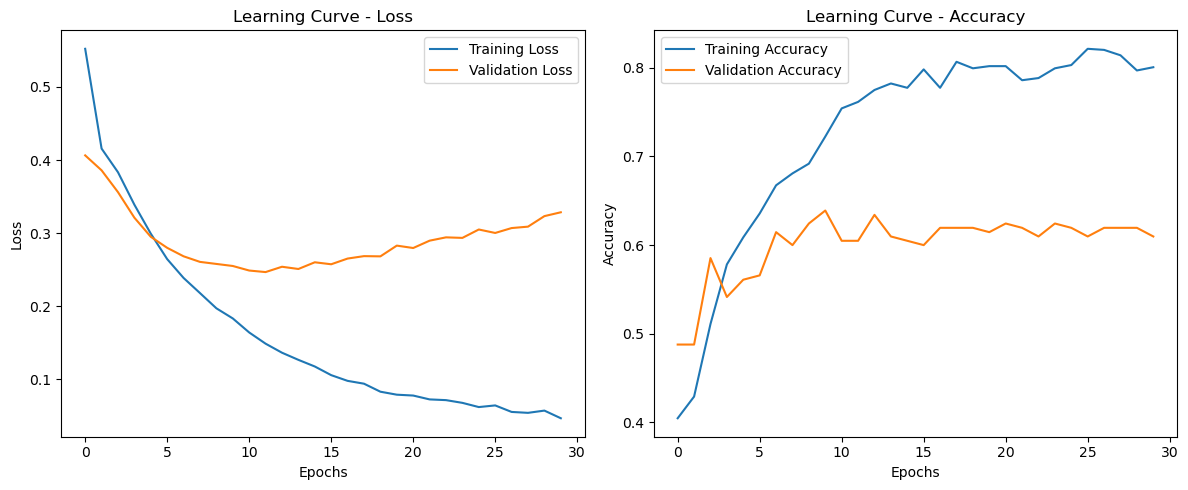

In [62]:
# Visualize learning curves (Accuracy and Loss)
def plot_learning_curve(history):
    # Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curve - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.tight_layout()
    plt.show()

# Call the function to display the curves
plot_learning_curve(history)

## BERT model

The textual representations are extracted through the ``pooler_output`` layer of BERT. BERT serves as an encoder for the texts, while additional dense layers perform the final prediction.

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

# Handle missing values
df['Justification'] = df['Justification'].fillna('')  # Replace NaN values in the "Justification" column with empty strings
categories = [f'Category {i}' for i in range(14, 22)]
df[categories] = df[categories].fillna(0)  # Replace NaN values in the target columns with 0

# Prepare the data
X = df['Justification']
y = df[categories].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
def encode_texts(texts, tokenizer, max_len=128):
    return tokenizer(
        list(texts),
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors="tf"
    )

train_encodings = encode_texts(X_train, tokenizer)
test_encodings = encode_texts(X_test, tokenizer)

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Build the model
input_ids = Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(128,), dtype=tf.int32, name='attention_mask')
bert_output = bert_model(input_ids, attention_mask=attention_mask)
pooled_output = bert_output.pooler_output
x = Dropout(0.3)(pooled_output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(categories), activation='sigmoid')(x)

model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    y_train.values,
    validation_data=( 
        {'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']},
        y_test.values
    ),
    epochs=10,
    batch_size=16,
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = model.predict({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']})
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Calculate metrics for each category
metrics_data = []
for i, category in enumerate(categories):
    acc = accuracy_score(y_test.values[:, i], y_pred_binary[:, i])
    prec = precision_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    rec = recall_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    f1 = f1_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    
    metrics_data.append({
        "Category": category,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Convert metrics data into a DataFrame
metrics_df = pd.DataFrame(metrics_data)
print("Classification Report:")
print(metrics_df)

# Save the model
model.save("bert_multi_label_model")

# Save the tokenizer
import pickle
with open("bert_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/10
52/52 [==============================] - 556s 10s/step - loss: 0.5286 - accuracy: 0.3374 - val_loss: 0.3679 - val_accuracy: 0.5756
Epoch 2/10
52/52 [==============================] - 500s 10s/step - loss: 0.3735 - accuracy: 0.5196 - val_loss: 0.3002 - val_accuracy: 0.6390
Epoch 3/10
52/52 [==============================] - 496s 10s/step - loss: 0.3147 - accuracy: 0.5990 - val_loss: 0.2602 - val_accuracy: 0.6878
Epoch 4/10
52/52 [==============================] - 500s 10s/step - loss: 0.2551 - accuracy: 0.6650 - val_loss: 0.2655 - val_accuracy: 0.7220
Epoch 5/10
52/52 [==============================] - 503s 10s/step - loss: 0.2269 - accuracy: 0.6773 - val_loss: 0.1999 - val_accuracy: 0.7171
Epoch 6/10
52/52 [==============================] - 501s 10s/step - loss: 0.1834 - accuracy: 0.7421 - val_loss: 0.1871 - val_accuracy: 0.7220
Epoch 7/10
52/52 [==============================] - 501s 10s/step - loss: 0.1550 - accuracy: 0.7592 - val_loss: 0.1898 - val_accuracy: 0.7366
Epoch 

INFO:tensorflow:Assets written to: bert_multi_label_model\assets


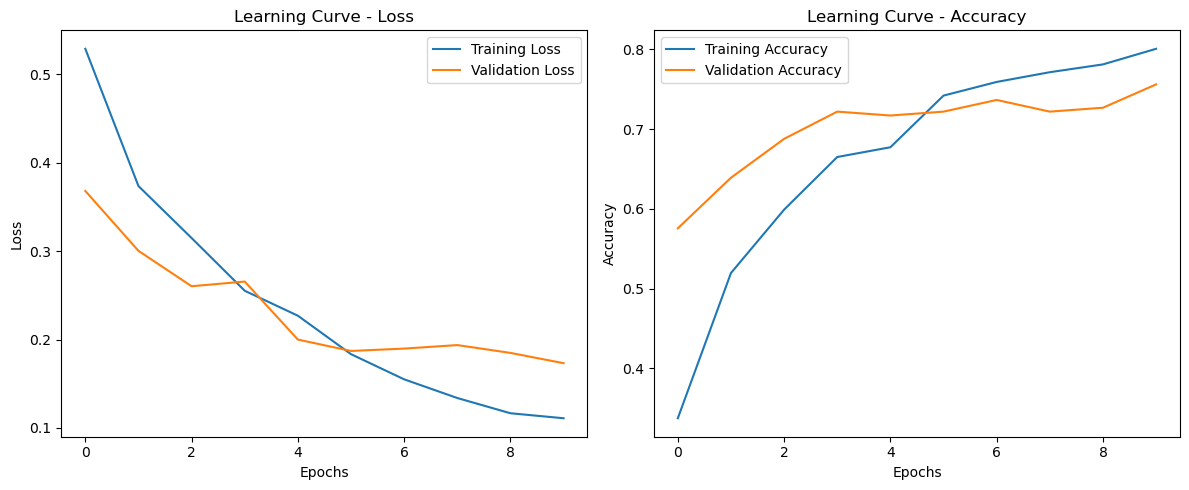

In [60]:
# Visualize learning curves (Accuracy and Loss)
def plot_learning_curve(history):
    # Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curve - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.tight_layout()
    plt.show()

# Call the function to display the curves
plot_learning_curve(history)


## GTP_model
GPT is a generative model primarily specialized in text generation. Here, we use GPT-2, which we adapt for the classification task.

In [ ]:
# Load the data
df = pd.read_excel("Electroscope_model_just_noimages_studentID.xlsx")

# Prepare the data
df = df[["Justification", "Category 14", "Category 15", "Category 16", "Category 17", "Category 18", "Category 19", "Category 20", "Category 21"]]
df = df.dropna(subset=["Justification"])
df.fillna(0, inplace=True)
categories = ["Category 14", "Category 15", "Category 16", "Category 17", "Category 18", "Category 19", "Category 20", "Category 21"]
df[categories] = df[categories].astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df["Justification"], df[categories], test_size=0.2, random_state=42)

# Initialize the tokenizer and base GPT-2 model
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
base_model = TFAutoModel.from_pretrained("gpt2")

# Tokenization
def tokenize_texts(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

train_tokens = tokenize_texts(X_train, tokenizer)
test_tokens = tokenize_texts(X_test, tokenizer)

# Build the model with global pooling and classification
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name="attention_mask")

# Pass through GPT-2 model
outputs = base_model(input_ids, attention_mask=attention_mask)
hidden_states = outputs.last_hidden_state  # Shape: [batch_size, seq_length, hidden_dim]

# Apply global pooling on the sequence
pooled_output = tf.keras.layers.GlobalAveragePooling1D()(hidden_states)

# Add a dense layer for multi-label classification
logits = tf.keras.layers.Dense(8, activation="sigmoid")(pooled_output)

# Define the final model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=logits)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    {"input_ids": train_tokens["input_ids"], "attention_mask": train_tokens["attention_mask"]},
    y_train.values,
    validation_split=0.1,
    epochs=10,
    batch_size=16
)

# Evaluate and compute metrics
y_pred = model.predict({"input_ids": test_tokens["input_ids"], "attention_mask": test_tokens["attention_mask"]})
y_pred_binary = (y_pred > 0.5).astype(int)

metrics_data = []
for i, category in enumerate(categories):
    acc = accuracy_score(y_test.values[:, i], y_pred_binary[:, i])
    prec = precision_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    rec = recall_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    f1 = f1_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    
    metrics_data.append({
        "Category": category,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


Epoch 1/10
46/46 [==============================] - 459s 9s/step - loss: 1.0600 - accuracy: 0.1970 - val_loss: 0.4434 - val_accuracy: 0.4024
Epoch 2/10
46/46 [==============================] - 407s 9s/step - loss: 0.3935 - accuracy: 0.4511 - val_loss: 0.3956 - val_accuracy: 0.5244
Epoch 3/10
46/46 [==============================] - 600s 13s/step - loss: 0.3548 - accuracy: 0.5326 - val_loss: 0.3546 - val_accuracy: 0.5000
Epoch 4/10
46/46 [==============================] - 10708s 238s/step - loss: 0.2944 - accuracy: 0.5951 - val_loss: 0.2946 - val_accuracy: 0.5976
Epoch 5/10
46/46 [==============================] - 827s 18s/step - loss: 0.2314 - accuracy: 0.6549 - val_loss: 0.2393 - val_accuracy: 0.6220
Epoch 6/10
46/46 [==============================] - 891s 19s/step - loss: 0.1910 - accuracy: 0.6902 - val_loss: 0.2720 - val_accuracy: 0.5732
Epoch 7/10
46/46 [==============================] - 859s 19s/step - loss: 0.1564 - accuracy: 0.7310 - val_loss: 0.2139 - val_accuracy: 0.6585
Epoch

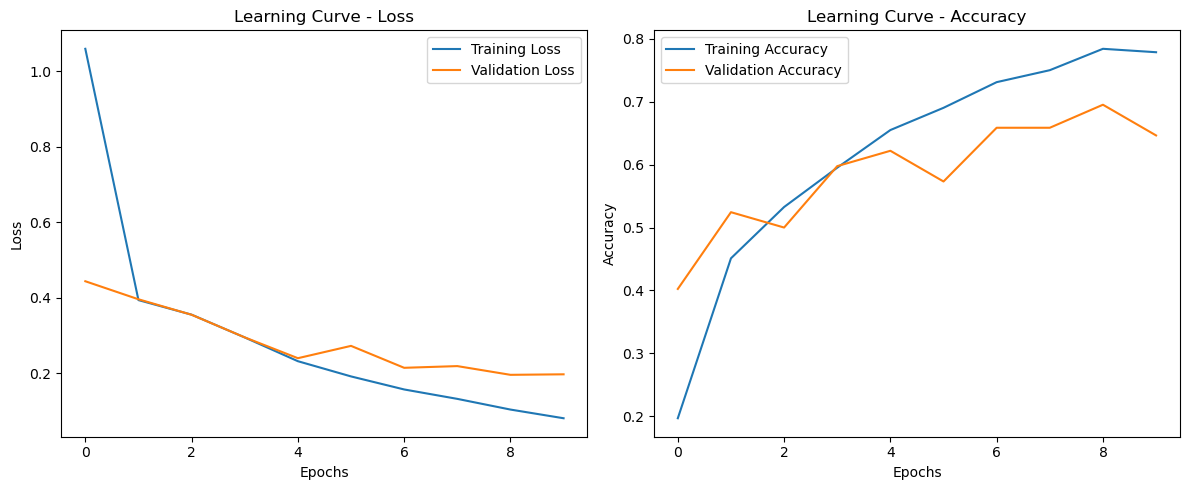

In [58]:
# Visualize learning curves (Accuracy and Loss)
def plot_learning_curve(history):
    # Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curve - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.tight_layout()
    plt.show()

# Call the function to display the curves
plot_learning_curve(history)


## SciBERT

In [ ]:
# Load the data
df = pd.read_excel("Electroscope_model_just_noimages_studentID.xlsx")

# Select relevant columns
df = df[["Justification", "Category 14", "Category 15", "Category 16", "Category 17", "Category 18", "Category 19", "Category 20", "Category 21"]]

# Remove rows with missing justification
df = df.dropna(subset=["Justification"])

# Replace NaN in categories with 0 (if applicable)
df.fillna(0, inplace=True)

# Convert categories to integer type
categories = ["Category 14", "Category 15", "Category 16", "Category 17", "Category 18", "Category 19", "Category 20", "Category 21"]
df[categories] = df[categories].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["Justification"], df[categories], test_size=0.2, random_state=42)

# Initialize the tokenizer and SciBERT model
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
scibert_model = TFAutoModel.from_pretrained("allenai/scibert_scivocab_uncased", from_pt=True)

# Tokenize texts with fixed length
def tokenize_texts(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        max_length=max_length,
        padding="max_length",  # Add [PAD] tokens to reach max length
        truncation=True,       # Truncate sequences that are too long
        return_tensors="tf"
    )

train_tokens = tokenize_texts(X_train, tokenizer, max_length=128)
test_tokens = tokenize_texts(X_test, tokenizer, max_length=128)

# Define the multi-label classification model with SciBERT
def create_model():
    input_ids = tf.keras.Input(shape=(128,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.Input(shape=(128,), dtype=tf.int32, name="attention_mask")

    bert_output = scibert_model(input_ids, attention_mask=attention_mask)
    pooled_output = bert_output.last_hidden_state[:, 0, :]  # Use the first token (CLS)
    dense = tf.keras.layers.Dense(256, activation="relu")(pooled_output)
    output = tf.keras.layers.Dense(8, activation="sigmoid")(dense)  # 8 categories

    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = create_model()

# Train the model
history = model.fit(
    {"input_ids": train_tokens["input_ids"], "attention_mask": train_tokens["attention_mask"]},
    y_train.values,
    validation_split=0.1,
    epochs=10,
    batch_size=16
)

# Predictions on the test set
y_pred = model.predict({"input_ids": test_tokens["input_ids"], "attention_mask": test_tokens["attention_mask"]})
y_pred_binary = (y_pred > 0.5).astype(int)

# List to store metrics
metrics_data = []

# Calculate metrics for each category individually
for i, category in enumerate(categories):
    acc = accuracy_score(y_test.values[:, i], y_pred_binary[:, i])
    prec = precision_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    rec = recall_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    f1 = f1_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    
    metrics_data.append({
        "Category": category,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

Epoch 1/10


46/46 [==============================] - 432s 9s/step - loss: 0.3667 - accuracy: 0.5367 - val_loss: 0.2491 - val_accuracy: 0.6220
Epoch 2/10
46/46 [==============================] - 387s 8s/step - loss: 0.1922 - accuracy: 0.7120 - val_loss: 0.1857 - val_accuracy: 0.6707
Epoch 3/10
46/46 [==============================] - 382s 8s/step - loss: 0.1188 - accuracy: 0.7812 - val_loss: 0.1691 - val_accuracy: 0.7561
Epoch 4/10
46/46 [==============================] - 390s 8s/step - loss: 0.0761 - accuracy: 0.8111 - val_loss: 0.1935 - val_accuracy: 0.6463
Epoch 5/10
46/46 [==============================] - 3004s 67s/step - loss: 0.0524 - accuracy: 0.8043 - val_loss: 0.1700 - val_accuracy: 0.6829
Epoch 6/10
46/46 [==============================] - 350s 8s/step - loss: 0.0340 - accuracy: 0.8234 - val_loss: 0.1815 - val_accuracy: 0.6585
Epoch 7/10
46/46 [==============================] - 378s 8s/step - loss: 0.0235 - accuracy: 0.8152 - val_loss: 0.1740 - val_accuracy: 0.7439
Epoch 8/10
46/46 [====

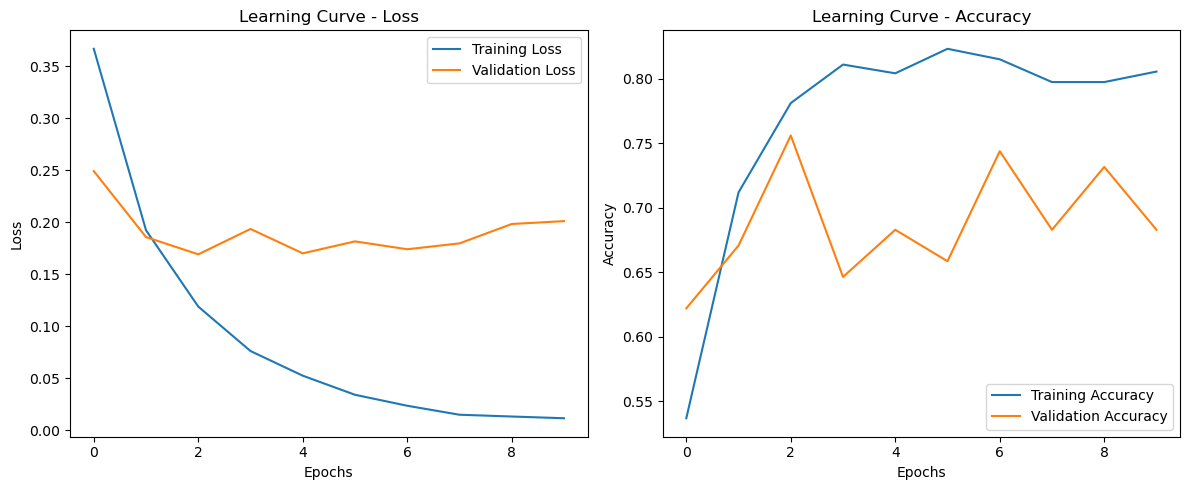

In [48]:
# Visualize learning curves (Accuracy and Loss)
def plot_learning_curve(history):
    # Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curve - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.tight_layout()
    plt.show()

# Call the function to display the curves
plot_learning_curve(history)


## Commentary:
After training our various models, we observed that generative models, particularly ``SciBERT``, deliver the best performance. A possible explanation for this result is that ``SciBERT`` **is a pre-trained model on scientific texts, which gives it a greater ability to handle and understand scientific vocabulary**.

However, we also note that the accuracy for highly imbalanced categories remains very low, which aligns with our hypotheses about the negative impact of data imbalance on model performance.

In the next section, we will perform data augmentation to balance the classes. We will then retrain the best-performing model identified so far to assess whether this approach can positively impact overall performance.

## Data Augmentation and Impact Analysis on Different Models
- Since we are working with textual data, we will use a synonym-based approach with ``TextBlob``. This method involves reproducing certain justifications (the input variable) by replacing some words with their synonyms, while assigning the same classes to the new samples as the original text.


- The main challenge with this type of data, which involves multiple target variables, is the difficulty of generating samples that balance all the classes simultaneously. Indeed, generating new examples may help balance certain classes, but it can also affect others. This is particularly true since our dataset does not contain any examples where all the target variables have the value "1". If such examples existed, they could be used to generate new samples, which would ensure that all classes are balanced at the same time.

In [ ]:
# Load the data
df = pd.read_excel("Electroscope_model_just_noimages_studentID.xlsx")

# Remove rows with missing justification
df = df.dropna(subset=["Justification"])

In [243]:
import random
from textblob import Word

# Function to augment text (simple synonym replacement)
def replace_synonym(text):
    words = text.split()
    new_words = []
    for word in words:
        blob_word = Word(word)
        if blob_word.synsets:
            synonym = random.choice(blob_word.synsets[0].lemmas()).name()  # Choose a synonym
            if synonym != word:
                new_words.append(synonym)
            else:
                new_words.append(word)
        else:
            new_words.append(word)
    return ' '.join(new_words)

# List of target categories (14 to 21)
categories = ['Category 14', 'Category 15', 'Category 16', 'Category 17', 'Category 18', 'Category 19', 'Category 20', 'Category 21']

# Augment data for each target category
for category in categories:
    # Filter rows where the category has a value of 1 (minority class)
    minority_class = df[df[category] == 1]
    
    # Perform aggressive augmentation by duplicating examples of class 1
    augmented_data = minority_class.copy()
    num_augmentations = 1  # Increase this number for more repetitions of examples
    augmented_data_repeated = pd.concat([augmented_data] * num_augmentations, ignore_index=True)
    
    # Generate new rows by augmenting the texts associated with the minority class
    augmented_data_repeated['Justification'] = augmented_data_repeated['Justification'].apply(replace_synonym)
    
    # Add the new augmented data to the original dataset
    df = pd.concat([df, augmented_data_repeated], ignore_index=True)


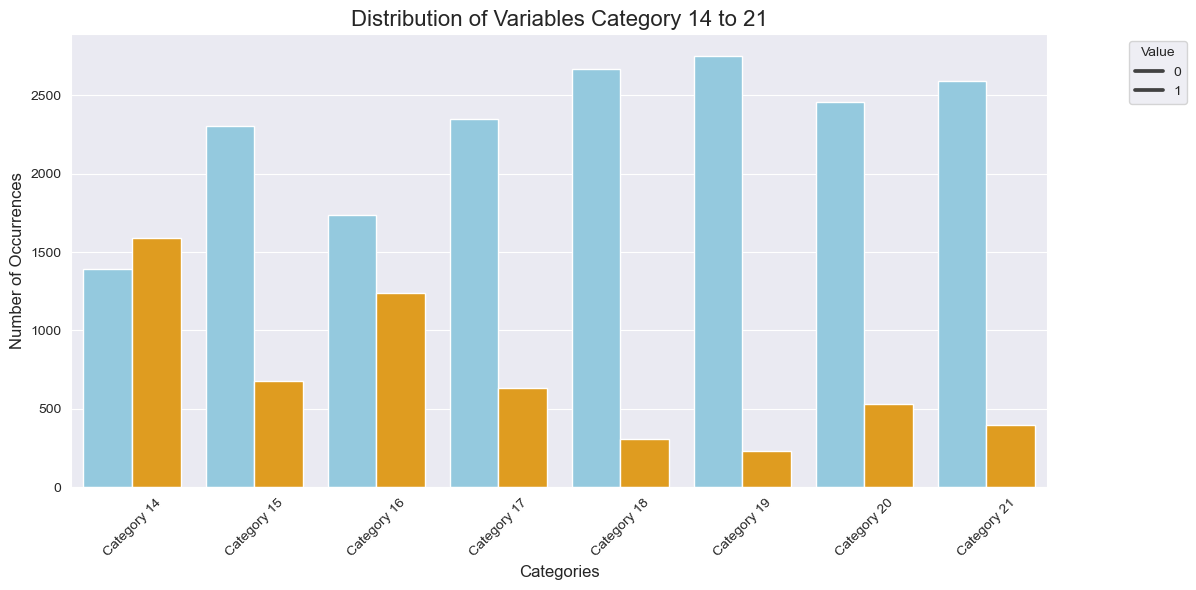

In [244]:
# Select category columns
categories = [f'Category {i}' for i in range(14, 22)]

# Compute the distribution (count of 0s and 1s for each category)
category_counts = pd.DataFrame({col: df[col].value_counts() for col in categories}).fillna(0).astype(int)

# Transpose the data for compatibility with Seaborn
category_counts = category_counts.T
category_counts.reset_index(inplace=True)
category_counts = category_counts.rename(columns={"index": "Category", 0: "0 (Count)", 1: "1 (Count)"})

# Prepare the data for Seaborn
category_counts_melted = category_counts.melt(id_vars=["Category"], 
                                              value_vars=["0 (Count)", "1 (Count)"], 
                                              var_name="Value", 
                                              value_name="Count")

# Define a custom palette with sky blue and orange
custom_palette = ["#87CEEB", "#FFA500"]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts_melted, x="Category", y="Count", hue="Value", palette=custom_palette)

# Add labels and a title
plt.title("Distribution of Variables Category 14 to 21", fontsize=16)
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.legend(title="Value", labels=["0", "1"], loc="upper right", bbox_to_anchor=(1.15, 1))

# Adjust tick rotations for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [245]:
df.shape

(2984, 25)

We observe that the data augmentation performed by our algorithm had positive effects only on the first four categories. The last three categories remain unbalanced. This is due to the fact that the different categories do not share the same distribution. Augmenting one class for certain categories tends to increase the opposite class in others.

We will apply a different algorithm to this new dataset to try and balance the last three classes.

In [246]:
import random
from textblob import Word
import pandas as pd

# Function to augment text (simple synonym replacement)
def replace_synonym(text):
    words = text.split()
    new_words = []
    for word in words:
        blob_word = Word(word)
        if blob_word.synsets:
            synonym = random.choice(blob_word.synsets[0].lemmas()).name()  # Choose a synonym
            if synonym != word:
                new_words.append(synonym)
            else:
                new_words.append(word)
        else:
            new_words.append(word)
    return ' '.join(new_words)

# List of target categories (14 to 21)
categories = ['Category 14', 'Category 15', 'Category 16', 'Category 17', 'Category 18', 'Category 19', 'Category 20', 'Category 21']

# Initialize a counter for the total number of generated data points
total_generated = 0
MAX_GENERATED = 10000  # Limit of generated data points

# Function to balance class data for a target category
def balance_category_data(df, category):
    global total_generated  # Use the global counter
    
    # Filter rows where the category has a value of 1 (minority class)
    minority_class = df[df[category] == 1]
    
    # Filter rows where the category has a value of 0 (majority class)
    majority_class = df[df[category] == 0]
    
    # Calculate how many examples need to be added to balance the classes
    minority_count = minority_class.shape[0]
    majority_count = majority_class.shape[0]
    
    # If the majority class is larger, augment the minority class
    if minority_count < majority_count and total_generated < MAX_GENERATED:
        # Number of samples to generate to balance the classes
        num_samples_to_generate = min(majority_count - minority_count, MAX_GENERATED - total_generated)
        
        # Generate new rows by augmenting texts associated with the minority class
        augmented_data = minority_class.copy()
        augmented_data['Justification'] = augmented_data['Justification'].apply(replace_synonym)
        
        # Repeat augmentation to create enough examples
        augmented_data = pd.concat(
            [augmented_data] * (num_samples_to_generate // minority_count + 1),
            ignore_index=True
        )
        augmented_data = augmented_data.iloc[:num_samples_to_generate]  # Limit to the required number
        
        # Update the counter
        total_generated += num_samples_to_generate
        
        # Add the new augmented data to the original dataset
        df = pd.concat([df, augmented_data], ignore_index=True)
    
    return df

# Apply the function to each target category from 14 to 21
for category in categories:
    if total_generated >= MAX_GENERATED:
        break  # Stop processing if the limit is reached
    df = balance_category_data(df, category)

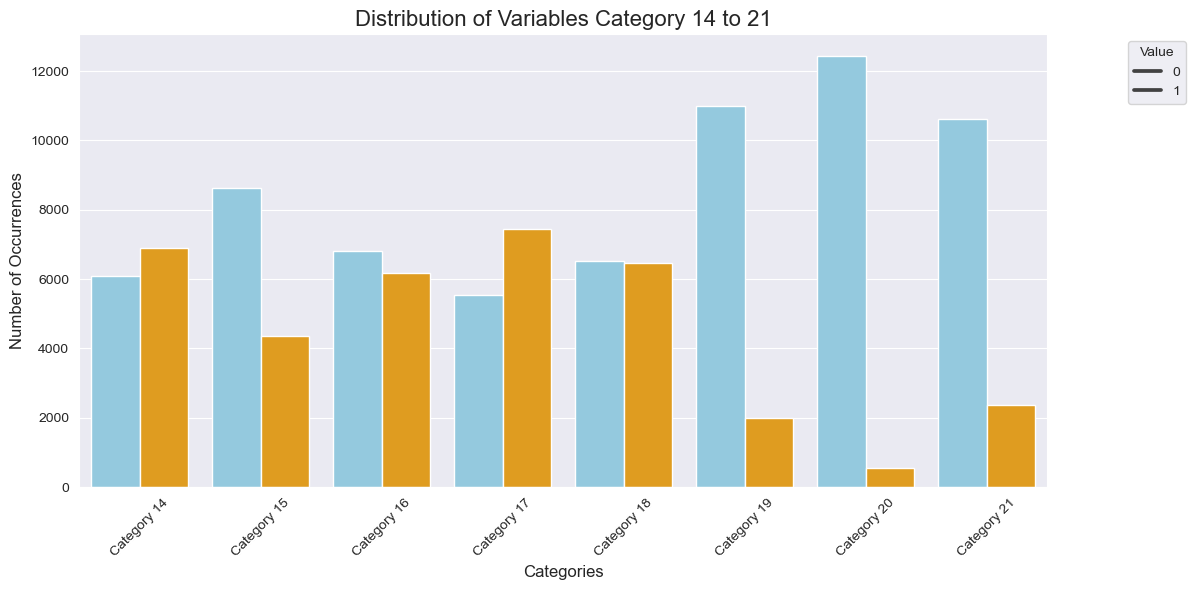

In [247]:
# Select the category columns
categories = [f'Category {i}' for i in range(14, 22)]

# Calculate the distribution (count of 0s and 1s for each category)
category_counts = pd.DataFrame({col: df[col].value_counts() for col in categories}).fillna(0).astype(int)

# Transpose the data for compatibility with Seaborn
category_counts = category_counts.T
category_counts.reset_index(inplace=True)
category_counts = category_counts.rename(columns={"index": "Category", 0: "0 (Count)", 1: "1 (Count)"})

# Prepare the data for Seaborn
category_counts_melted = category_counts.melt(id_vars=["Category"], 
                                              value_vars=["0 (Count)", "1 (Count)"], 
                                              var_name="Value", 
                                              value_name="Count")

# Define a custom palette with sky blue and orange
custom_palette = ["#87CEEB", "#FFA500"]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts_melted, x="Category", y="Count", hue="Value", palette=custom_palette)

# Add labels and a title
plt.title("Distribution of Variables Category 14 to 21", fontsize=16)
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.legend(title="Value", labels=["0", "1"], loc="upper right", bbox_to_anchor=(1.15, 1))

# Adjust tick rotation for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [248]:
df.shape

(12984, 25)

At this stage, our data is still not fully balanced. This will require additional algorithms focused on the last three categories. However, let us pause here and first evaluate whether this slight improvement has a positive impact on the precision of Category 17, which has been causing significant issues for our models.

In [ ]:
# Replace NaN in categories with 0 (if applicable)
df.fillna(0, inplace=True)

# Convert categories to integer type
categories = ["Category 14", "Category 15", "Category 16", "Category 17", "Category 18", "Category 19", "Category 20", "Category 21"]
df[categories] = df[categories].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["Justification"], df[categories], test_size=0.2, random_state=42)

# Initialize the tokenizer and SciBERT model
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
scibert_model = TFAutoModel.from_pretrained("allenai/scibert_scivocab_uncased", from_pt=True)

# Tokenize texts with fixed length
def tokenize_texts(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        max_length=max_length,
        padding="max_length",  # Add [PAD] tokens to reach max length
        truncation=True,       # Truncate sequences that are too long
        return_tensors="tf"
    )

train_tokens = tokenize_texts(X_train, tokenizer, max_length=128)
test_tokens = tokenize_texts(X_test, tokenizer, max_length=128)

# Define the multi-label classification model with SciBERT
def create_model():
    input_ids = tf.keras.Input(shape=(128,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.Input(shape=(128,), dtype=tf.int32, name="attention_mask")

    bert_output = scibert_model(input_ids, attention_mask=attention_mask)
    pooled_output = bert_output.last_hidden_state[:, 0, :]  # Use the first token (CLS)
    dense = tf.keras.layers.Dense(256, activation="relu")(pooled_output)
    output = tf.keras.layers.Dense(8, activation="sigmoid")(dense)  # 8 categories

    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = create_model()

# Train the model
history = model.fit(
    {"input_ids": train_tokens["input_ids"], "attention_mask": train_tokens["attention_mask"]},
    y_train.values,
    validation_split=0.1,
    epochs=10,
    batch_size=16
)

# Predictions on the test set
y_pred = model.predict({"input_ids": test_tokens["input_ids"], "attention_mask": test_tokens["attention_mask"]})
y_pred_binary = (y_pred > 0.5).astype(int)

# List to store metrics
metrics_data = []

# Calculate metrics for each category individually
for i, category in enumerate(categories):
    acc = accuracy_score(y_test.values[:, i], y_pred_binary[:, i])
    prec = precision_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    rec = recall_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    f1 = f1_score(y_test.values[:, i], y_pred_binary[:, i], zero_division=0)
    
    metrics_data.append({
        "Category": category,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

Epoch 1/10


102/585 [====>.........................] - ETA: 1:02:14 - loss: 0.3195 - accuracy: 0.4737

In [ ]:
# Visualize learning curves (Accuracy and Loss)
def plot_learning_curve(history):
    # Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curve - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.tight_layout()
    plt.show()

# Call the function to display the curves
plot_learning_curve(history)


## Conclusion on the Impact of Data Augmentation
We can observe that the data augmentation helped balance Category 17, which resulted in a significant improvement in precision for this variable. This suggests that if our data were fully balanced, we might achieve even better performance.

In the next steps of our work, we will continue augmenting our data to create a more balanced

## General Conclusion
Based on the various experiments conducted, we can conclude that generative models are well-suited for multiclass classification problems with textual data as input. Despite the significant imbalance and limited quantity of our data, these models achieve acceptable levels of precision.

After adjusting our data, we observed that one of the models best suited for this task (``SciBERT``) produced more impressive performance. This leads us to hypothesize that generative models could deliver strong performance for multiclass classification problems if they are trained with a sufficient amount of well-balanced data.